### Multivariable linear regression



The yield ($Y$) of an experiment was measured as a function of two variables, the saturation level ($X1$ and the level of transisomers ($X2$. The following data is provided



In [1]:
import numpy as np

# level of saturation
X1 = np.array([38, 41, 34, 35, 31, 34, 29, 32])

# level of transisomers
X2 = np.array([47.5, 21.3, 36.5, 18.0, 29.5, 14.2, 21.0, 10.0])

# the yield
Y = np.array([66.0, 43.0,36.0, 23.0,22.0,14.0, 12.0,7.6])

:results:
 # Out [1]:
 :end:

Fit this data to the model $Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2$. Show what the parameters are, their confidence intervals, and a plot that shows how your model fits the data.



Make a plot of the residual errors (i.e. the error in each prediction point).



Compute an R^$2$ value for the fit.



### solution



This is a straight forward regression problem. The best way to solve this is with the regress function in pycse.



In [1]:
X = np.stack([X1**0, X1, X2], axis=1)

from pycse import regress
b, bint, se = regress(X, Y, alpha=0.05)
print(f'The fitted parameters are {b}')

# Out [2]:
# output
The fitted parameters are [-94.55202884   2.80155136   1.07268262]
/Users/jkitchin/vc/projects/gumroad-books/pycse/pycse/PYCSE.py:62: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b, res, rank, s = np.linalg.lstsq(A, y)

In [1]:
for i, interval in enumerate(bint):
    print(f'The 95% confidence interval on beta_{i} is {interval}')

# Out [4]:
# output
The 95% confidence interval on beta_0 is [-122.21494063  -66.88911706]
The 95% confidence interval on beta_1 is [1.96590274 3.63719998]
The 95% confidence interval on beta_2 is [0.81382098 1.33154425]

It is somewhat tricky to visualize this 2D data set. The easiest way is with a parity plot, i.e. plot the predicted values against the known Y values.



# Out [6]:
# text/plain
Text(0, 0.5, 'Predicted Y values')

# text/plain
<Figure size 432x288 with 1 Axes>

# image/png

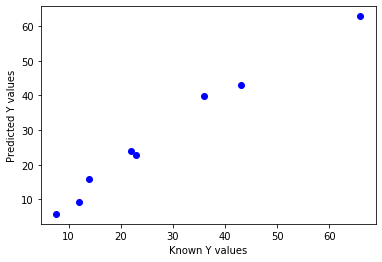

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(Y, X @ b, 'bo')
plt.xlabel('Known Y values')
plt.ylabel('Predicted Y values')

The R<sup>2</sup> value is defined by:

$R^{2} = 1 - \frac{(\mathbf{y} - \mathbf{f}) \cdot (\mathbf{y} - \mathbf{f})}{(\mathbf{y} - \bar{y}) \cdot (\mathbf{y} - \bar{y})}$



In [1]:
ymf = Y - X @ b
ymm = Y - np.mean(Y)

R2 = 1 - (ymf @ ymf) / (ymm @ ymm)
print(f'R^2 = {R2:1.2f}')

# Out [9]:
# output
R^2 = 0.98

That is a pretty reasonable looking R<sup>2</sup> value.

